In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pymysql
import pandas as pd
import plotly as px
#MYSQL 연결하기
report_db =pymysql.connect(host='xxx.xxx.xxx.xx',user='root',password='xxxx',db='report_old_data',charset='utf8',autocommit=True,cursorclass=pymysql.cursors.DictCursor)

cursor = report_db.cursor(pymysql.cursors.DictCursor)
sql = "SELECT * FROM bssm_nt_led_status_hist;"
cursor.execute(sql)
result = cursor.fetchall()
#result1 = result.query('"2022-05-01 00:00:00"<= hist_dt <= "2022-06-01 00:00:00"')

result = pd.DataFrame(result)
result
###################################################################################
data_main = result
data1 = data_main
data2 = data1.query('"2022-05-01 00:00:00"<= hist_dt <= "2022-06-01 00:00:00"')
df_ex = data2[data2['onoff'] == 1]                                                # onoff 가 1인 것이 조명이 정상적으로 작동 중이란 것이다 
df_ex2 = df_ex[df_ex['report_uspace_yn'] == 'Y']                                  # report_uspace_yn = y -> report_data, n -> status_data
#df_ex3 = df_ex2[df_ex2['DID'] == 3]                                                
df_ex_final = df_ex2.reset_index(drop=True) # index 정리
#df_ex_final.tail(300)
df_ex_final
##################################################################################
df1 = df_ex_final
df1 ############################## report_data

,gid,did,mid,hist_dt,building_id,onoff,level,colortemp,hue,saturation,brightness,x,y,r,g,b,report_uspace_yn,operator
0,1,41,0,2022-05-01 00:01:11.652,101,1,100,5700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,None
1,1,41,0,2022-05-01 00:06:11.652,101,1,100,5700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,None
2,1,41,0,2022-05-01 00:11:11.654,101,1,100,5700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,None
3,1,41,0,2022-05-01 00:16:11.652,101,1,100,5700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,None
4,1,41,0,2022-05-01 00:21:11.654,101,1,100,5700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926683,6,127,0,2022-05-31 23:39:02.831,101,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,None
926684,6,127,0,2022-05-31 23:44:02.831,101,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,None
926685,6,127,0,2022-05-31 23:49:02.831,101,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,None
926686,6,127,0,2022-05-31 23:54:02.831,101,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,None


In [2]:
########################### 미터링 데이터 가져와 dfx 변수에 저장
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pymysql
import pandas as pd
import plotly as px

#MYSQL 연결하기
report_db =pymysql.connect(host='xxx.xxx.xx.xx',user='root',password='xxxx',db='SmartLight_compensation_data',charset='utf8',autocommit=True,cursorclass=pymysql.cursors.DictCursor)
cursor = report_db.cursor(pymysql.cursors.DictCursor)
sql = "SELECT * FROM raw_by_usage_20220501_20220531;"
cursor.execute(sql)
resultx = cursor.fetchall()
resultx = pd.DataFrame(resultx)
resultx
###############################################################
data_mainx = resultx
data1x = data_mainx
df_exx = data1x[data1x['GID'] == 64256] # data1 = 총 데이터,
df_ex2x = df_exx[df_exx['CHANNEL'] == 10]                        ### 채널별로 추출
#df_ex3 = df_ex2[df_ex2['DID'] == 3]
df_ex_finalx = df_ex2x.reset_index(drop=True) # index 정리
#df_ex_final.tail(300)
#df_ex_finalx
################################################################
dfx = df_ex_finalx
dfx['USE_DATETIME'] = pd.to_datetime(dfx['USE_DATETIME'])
###############################################################
# 시간내 결측치 구간에 시간을 추가 한후, 나머지 행에 null 값을 추가한다 
# 00:00:00
#  x          -> 추가로 00:01:00   
# 00:02:00
while True:
    time_list=[]
    for p in range(len(dfx)-1):
        if (dfx['USE_DATETIME'][p+1]-dfx['USE_DATETIME'][p]).seconds/60>1:
            for t in range(int((dfx['USE_DATETIME'][p+1]-dfx['USE_DATETIME'][p]).seconds/60)+int(
                    (dfx['USE_DATETIME'][p+1]-dfx['USE_DATETIME'][p]).days*24*60)-1):
                time_list.append(dfx['USE_DATETIME'][p]+datetime.timedelta(minutes=1*(t+1)))
                
            break  

    length=len(time_list)        
    input_date=time_list
    input_value=[np.nan for x in range(len(time_list))]
    new_data=pd.DataFrame({'USE_DATETIME':input_date,
              'ACTIVE_POWER':input_value
              })
    idx = p+1
    temp1 = dfx[dfx.index < idx]
    temp2 = dfx[dfx.index >= idx]
    dfx = temp1.append(new_data,ignore_index=True).append(temp2, ignore_index=True)
    idx=idx
    if length==0:
        break
        
df1_metering = dfx ##################### metering_data

In [135]:
df1_metering1 = df1_metering ### 미터링 데이터
df1_report1 = df1           ### 센서 데이터
dfreport222 = df1_report1


In [4]:
#did_in_ch = [46,47,48,49,52,53,81,82,83,84,85,86,87,88]
report_sortedx = df1_report1.query('did == 46| did == 47| did == 48| did == 49| did == 52| did == 53| did == 81| did == 82| did == 83| did == 84| did == 85| did == 86| did == 87| did == 88')
report_sortedxx = report_sortedx.sort_values(by=['hist_dt'], axis = 0, ascending = True)

dfx123 = pd.DataFrame(report_sortedxx, columns=['hist_dt','did','level'])
report_xx = dfx123.values.tolist()

report_sorted1 = report_sortedxx.drop_duplicates(['did'])    ### duplicates drop 하면 안된다
#report_sorted2 = report_sorted.sort_values(by=['did'], axis = 0, ascending = True)
report_did_list = report_sorted1['did'].to_list()            ### duplicates drop 하고 sort 하면 안된다
report_did_count = len(report_did_list)
report_length = int(len(report_sortedxx)/len(report_did_list)) + 1

report_sortedxxx = report_sortedxx.reset_index(drop=True)  ### main

did_counter = int(report_did_count - 1)

complete_list2 = []
zero = 0
tmp_list = []
for abyscuss in range (report_length):
    alpha = []
    for bravo in range(4):
        alpha.append(0)
    complete_list2.append(alpha)

ct = 0
for i in range(report_length):
    tmp_list = report_xx[ct:int(report_did_count+ct-1)]
    tmp_list_df = pd.DataFrame(data = tmp_list, columns=['hist_dt','did','level'])
    level_countx = tmp_list_df.duplicated(['level'], keep = False)
    
    
    
    if level_countx.all() == True:
        complete_list2[i][0] = tmp_list_df.loc[0,'hist_dt']
        complete_list2[i][1] = tmp_list_df.loc[0,'did']
        complete_list2[i][2] = tmp_list_df.loc[0,'level']
    ct = ct + did_counter + 1
    
complete222 = pd.DataFrame(data = complete_list2, columns=['hist_dt','did','level','zeros'])
complete222





,hist_dt,did,level,zeros
0,2022-05-01 00:01:11.652,46,100,0
1,2022-05-01 00:06:11.652,47,100,0
2,2022-05-01 00:11:11.654,46,100,0
3,2022-05-01 00:16:11.652,86,100,0
4,2022-05-01 00:21:11.654,85,100,0
...,...,...,...,...
8921,2022-05-31 23:38:49.192,47,100,0
8922,2022-05-31 23:43:49.192,46,100,0
8923,2022-05-31 23:48:49.192,48,100,0
8924,2022-05-31 23:53:49.192,83,100,0


In [66]:
report_time_listx = pd.DataFrame(data = complete222, columns=['hist_dt','level'])
metering_time_listx = pd.DataFrame(data = df1_metering1, columns=['USE_DATETIME','ACTIVE_POWER'])
report_time_listx['hist_dt'] = report_time_listx['hist_dt'].apply(lambda dt: datetime.datetime(dt.year,dt.month, dt.day, dt.hour, dt.minute))
#report_time_listx['hist_dt'] = report_time_listx['hist_dt'].apply(lambda dt: datetime.datetime(dt.year,dt.month, dt.day, dt.hour, round((float(dt.minute) + float(dt.second)/60) / 15)))
report_time_listx['Mean_Power'] = 0
report_time_listx
#metering_time_listx.drop(['0','1'])
metering_time_listx

,USE_DATETIME,ACTIVE_POWER
0,2022-05-01 00:00:00,405.0
1,2022-05-01 00:01:00,405.0
2,2022-05-01 00:02:00,405.0
3,2022-05-01 00:03:00,403.0
4,2022-05-01 00:04:00,405.0
...,...,...
44635,2022-05-31 23:55:00,403.0
44636,2022-05-31 23:56:00,403.0
44637,2022-05-31 23:57:00,401.0
44638,2022-05-31 23:58:00,403.0


In [109]:

met_complete_list = []
mettotx = 0
ct = 0
for india in range(8928): #A Single Month is made of 44,640 minutes, so 44,640 long list needed
    juliette = []
    for kilo in range(4):
        juliette.append(0)
    complete_list.append(juliette)

pd.to_datetime(metering_time_listx['USE_DATETIME'])
metering_time222 = metering_time_list111.resample(rule='5T',label='right').sum()
metering_time333 = metering_time222['ACTIVE_POWER'] / 5
metering_time444 = pd.DataFrame(metering_time333, columns=['ACTIVE_POWER'])
metering_time555 = metering_time444.reset_index(drop=False)
metering_time666 = metering_time555.drop([8925,8926,8927],axis=0)
metering_time777 = metering_time666.reset_index(drop=True)
metering_time777



,USE_DATETIME,ACTIVE_POWER
0,2022-05-01 00:05:00,404.6
1,2022-05-01 00:10:00,403.4
2,2022-05-01 00:15:00,404.6
3,2022-05-01 00:20:00,403.0
4,2022-05-01 00:25:00,403.4
...,...,...
8920,2022-05-31 23:25:00,403.0
8921,2022-05-31 23:30:00,401.4
8922,2022-05-31 23:35:00,402.6
8923,2022-05-31 23:40:00,402.4


In [74]:
repotimex = report_time_listx.loc[1]
repotime = repotimex['hist_dt']
repotime
metrtimex = metering_time_listx.loc[3]
metrtime = metrtimex['USE_DATETIME']
metrtime
metrpowr = metrtimex['ACTIVE_POWER']
metrpowr
metering_time_listx
#if metrtime == repotime:
#    print('o')
metering_time_listx.loc[2,'USE_DATETIME']

i = 1
j = 6
repotimex = report_time_listx.loc[i,'hist_dt']
metrtimex = metering_time_listx.loc[j,'USE_DATETIME']
repotime_minusx = report_time_listx.loc[i-1,'hist_dt']

qwe = 3
metering_time_listx.loc[qwe,'USE_DATETIME']
metering_time_listx.loc[j,'ACTIVE_POWER']

report_time_listx

,hist_dt,level,Mean_Power
0,2022-05-01 00:01:00,100,0
1,2022-05-01 00:06:00,100,0
2,2022-05-01 00:11:00,100,0
3,2022-05-01 00:16:00,100,0
4,2022-05-01 00:21:00,100,0
...,...,...,...
8921,2022-05-31 23:38:00,100,0
8922,2022-05-31 23:43:00,100,0
8923,2022-05-31 23:48:00,100,0
8924,2022-05-31 23:53:00,100,0


In [130]:
dfx123 = pd.DataFrame(report_sortedxx, columns=['hist_dt','did','level'])
report_xx = dfx123.values.tolist()
report_xx
report_time_listx

report_time222 = report_time111.reset_index(drop=True)

merged_df = pd.concat([report_time222,metering_time777], axis=1)
#report_time111
#metering_time777
merged_df

,hist_dt,level,Mean_Power,USE_DATETIME,ACTIVE_POWER
0,2022-05-01 00:06:00,100,0,2022-05-01 00:05:00,404.6
1,2022-05-01 00:11:00,100,0,2022-05-01 00:10:00,403.4
2,2022-05-01 00:16:00,100,0,2022-05-01 00:15:00,404.6
3,2022-05-01 00:21:00,100,0,2022-05-01 00:20:00,403.0
4,2022-05-01 00:26:00,100,0,2022-05-01 00:25:00,403.4
...,...,...,...,...,...
8920,2022-05-31 23:38:00,100,0,2022-05-31 23:25:00,403.0
8921,2022-05-31 23:43:00,100,0,2022-05-31 23:30:00,401.4
8922,2022-05-31 23:48:00,100,0,2022-05-31 23:35:00,402.6
8923,2022-05-31 23:53:00,100,0,2022-05-31 23:40:00,402.4


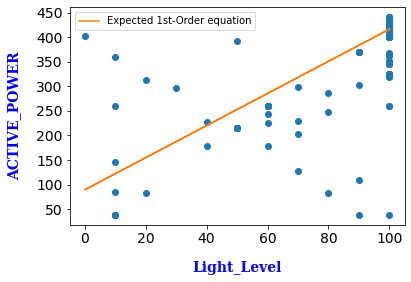

<Figure size 51840x25920 with 0 Axes>

1st Order Equation: y = [3.26465208]x + 89.6929906545962 
Total Mean Value of ACTIVE_POWER in Dataset:415.39370308123245


In [133]:
from sklearn.linear_model import LinearRegression
font1 = {'family':'serif','color':'b','weight':'bold','size':14}
x = merged_df['level']
y = merged_df['ACTIVE_POWER']

plt.plot(x,y,'o')
line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1,1),y)
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)), label = 'Expected 1st-Order equation')
plt.xlabel('Light_Level', labelpad=15, fontdict=font1)
plt.ylabel('ACTIVE_POWER', labelpad=15, fontdict=font1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.figure(figsize=(720,360))
plt.show()
coef = line_fitter.coef_
intercept = line_fitter.intercept_

print('1st Order Equation: y = {}x + {} '.format(coef,intercept))

mean_df = merged_df['ACTIVE_POWER'].mean()
print('Total Mean Value of ACTIVE_POWER in Dataset:{}'.format(mean_df))



In [5]:
#################################report_data#######################################  #report 내 5월달 시간 추출
data_main = df1_report1
data1 = data_main
data2 = data1.query('"2022-05-01 00:00:00"<= hist_dt <= "2022-06-01 00:00:00"')
#df_ex = data2[data2['onoff'] == 1] # data1 = 총 데이터,
#df_ex2 = df_ex[df_ex['CHANNEL'] == 1]
#df_ex3 = df_ex2[df_ex2['DID'] == 3]
df_ex_final = data2.reset_index(drop=True) # index 정리
#df_ex_final.tail(300)
df_ex_final

,gid,did,mid,hist_dt,building_id,onoff,level,colortemp,hue,saturation,brightness,x,y,r,g,b,report_uspace_yn,operator
0,1,41,0,2022-05-01 00:00:50.640,101,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None
1,1,41,0,2022-05-01 00:01:11.617,101,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None
2,1,41,0,2022-05-01 00:01:11.652,101,1,100,5700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,None
3,1,41,0,2022-05-01 00:01:26.624,101,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None
4,1,41,0,2022-05-01 00:06:11.652,101,1,100,5700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285641,6,127,0,2022-05-31 23:49:51.928,101,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None
4285642,6,127,0,2022-05-31 23:50:09.243,101,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None
4285643,6,127,0,2022-05-31 23:50:24.225,101,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,None
4285644,6,127,0,2022-05-31 23:54:02.831,101,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,None


In [5]:
df = df_ex_final
df2 = df.drop_duplicates(['did'])
df3 = df2.sort_values(by=['did'], axis = 0, ascending = True)
did_list = df3['did'].to_list()
did_count = len(did_list)
did_count      # Iteration에 필요한 did 갯수 구하기

108

In [6]:
dt1 = df.sort_values(by=['hist_dt'], axis = 0, ascending = True)
#dt1['hist_dt'] = dt1['hist_dt'].astype(str)
#dt1.groupby('hist_dt')['did']['level'].sum()
minute = [every_each_min for n,every_each_min in dt1.set_index('hist_dt').groupby(pd.Grouper(freq='T'))]
meteringx = [g for q, g in df1_metering1.set_index('USE_DATETIME').groupby(pd.Grouper(freq='T'))]
list_length = len(minute)

#Declare 2nd Dimension List for storing hist_dt and level
##################################################
complete_list = [] 
i = 0
histandlevel = [0,1]
for india in range(44640): #A Single Month is made of 44,640 minutes, so 44,640 long list needed
    juliette = []
    for kilo in range(4):
        juliette.append(0)
    complete_list.append(juliette)
################################################## 
for i in range(list_length):     
    #for j in histandlevel:
    minute_new = minute[i].reset_index()
    meteringx_new = meteringx[i].reset_index()
    level_count = minute_new.duplicated(['level'], keep=False)     # 할당된 시간 내 level이 모두 같은 값 인지 확인하여 bool 값으로 변환, 리스트 내 전부 True = level 값들이 전부 동일
    if len(minute_new) > 80 and level_count.all() == True: #did_count - 총 did 갯수, duplicated문 - 해당 n분 내 중복된 did가 있는지 확인, count.all() - level 중복값 확인 
        complete_list[i][0] = minute_new.loc[0,'hist_dt']
        complete_list[i][1] = minute_new.loc[0,'level']
        complete_list[i][2] = meteringx_new.loc[0,'USE_DATETIME']
        complete_list[i][3] = meteringx_new.loc[0,'ACTIVE_POWER']
  #  if len(minute[i]) > 30 and  level_count.all() == True and histandlevel == 1: #did_count - 총 did 갯수, duplicated문 - 해당 n분 내 중복된 did가 있는지 확인, count.all() - level 중복값 확인 
  #      complete_list[i][j-1] = minute[i].loc[0,'hist_dt']
  #      complete_list[i][j] = minute[i].loc[0,'level']
        
complete_list_actual = pd.DataFrame(complete_list)
complete_list_actual
        
#print('o')
        
#print(x)   

,0,1,2,3
0,0,0,0,0.0
1,2022-05-01 00:01:00.200000,100,2022-05-01 00:01:00,3152.0
2,0,0,0,0.0
3,0,0,0,0.0
4,0,0,0,0.0
...,...,...,...,...
44635,0,0,0,0.0
44636,0,0,0,0.0
44637,0,0,0,0.0
44638,2022-05-31 23:58:37.549000,100,2022-05-31 23:58:00,3287.0


In [7]:
#complete_list_actual.to_csv("actual_actual1.csv"
complete_list_actual_test = complete_list_actual
complete_list_actual_test.columns = ['time_recored_on_report','Light_Level','time_recored_on_metering','ACTIVE_POWER']
complete_test1 = complete_list_actual_test[complete_list_actual_test['Light_Level'] == 0].index
complete_list_actual_test = complete_list_actual_test.drop(complete_test1)
complete_test2 = complete_list_actual_test.dropna(subset=['ACTIVE_POWER'], how='any', axis=0)
complete_test2

,time_recored_on_report,Light_Level,time_recored_on_metering,ACTIVE_POWER
1,2022-05-01 00:01:00.200000,100,2022-05-01 00:01:00,3152.0
119,2022-05-01 01:59:00.257000,100,2022-05-01 01:59:00,3154.0
205,2022-05-01 03:25:00.645000,100,2022-05-01 03:25:00,3182.0
206,2022-05-01 03:26:00.352000,100,2022-05-01 03:26:00,3181.0
238,2022-05-01 03:58:00.639000,100,2022-05-01 03:58:00,3180.0
...,...,...,...,...
44619,2022-05-31 23:39:00.283000,100,2022-05-31 23:39:00,3291.0
44624,2022-05-31 23:44:02.831000,100,2022-05-31 23:44:00,3295.0
44633,2022-05-31 23:53:01.530000,100,2022-05-31 23:53:00,3295.0
44638,2022-05-31 23:58:37.549000,100,2022-05-31 23:58:00,3287.0


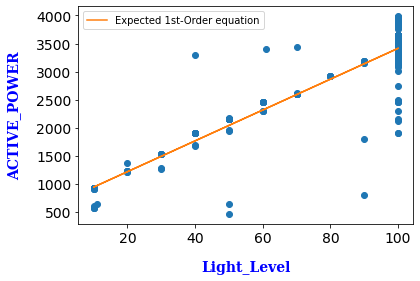

<Figure size 51840x25920 with 0 Axes>

1st Order Equation: y = [27.45700517]x + 668.4618127665703 
Total Mean Value of ACTIVE_POWER in Dataset:3407.7638958022235


In [8]:
#!pip install scikit-learn
from sklearn.linear_model import LinearRegression

font1 = {'family':'serif','color':'b','weight':'bold','size':14}

#y_predicted = line_fitter.predict(x)

x = complete_test2['Light_Level']
y = complete_test2['ACTIVE_POWER']


plt.plot(x,y,'o')
line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1,1),y)
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)), label = 'Expected 1st-Order equation')
plt.xlabel('Light_Level', labelpad=15, fontdict=font1)
plt.ylabel('ACTIVE_POWER', labelpad=15, fontdict=font1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.figure(figsize=(720,360))
plt.show()
coef = line_fitter.coef_
intercept = line_fitter.intercept_
#print(coef,intercept)
print('1st Order Equation: y = {}x + {} '.format(coef,intercept))

mean_df = complete_test2['ACTIVE_POWER'].mean()
print('Total Mean Value of ACTIVE_POWER in Dataset:{}'.format(mean_df))